In [4]:
import pandas as pd
import geopandas as gpd
import mapclassify
import plotly.express as px
import pycountry
import numpy as np

In [5]:
PATH_HAPPY = "../Data/world-happiness-report.csv"
PATH_HAPPY_2021 = "../Data/world-happiness-report-2021.csv"
PATH_ALCOHOL = "../Data/alcohol-consumption.csv"

# Data Visualisation (COM-480) - 2022
## <i>If Not Alcohol, What Makes Us Happy?</i>
### Milestone 2
---

### Visualizations
For the sake of practicality and to allow for more scalability, several medium complexity level visualizations are proposed, as opposed to a large complex visualization.

By displaying a central <b>timeline slider</b> on the webpage, the user can query entries from 2005 to 2021. As discussed, missing values are interpolated. With a certain selected year, the following are the planned visualizations:
- <b>Outlier Map.</b>
A colored world map showing outliers: here, countries whose happiness level is very different from what would have been expected from GDP/capita alone. For example, countries close to their expected happiness level are represented in gray, those far above in green shades and those below in red shades.
- <b>Distribution Plot for Happiness /  Alcohol Consumption.</b>
The objective is to plot the skew of the Happiness Score and alcohol consumption distributions to highlight their uniformity or inequality and discuss it. When hovering over each “bin” (i.e. vertical bar), the countries in that bin would become visible with the respective values.
- <b>Change of Ranking over Time (Bar Chart).</b>
Using a horizontal bar chart, the objective is to visualize the evolution of the ranking of the happiest countries.
- <b>Correlation: Scatterplot.</b>
The objective is to create an interactive 2D scatterplot, where the user can select the X-axis attribute (default: alcohol consumtion), while the Y-axis attribute is fixed to Happiness Score. Each point in the scatterplot would represent a country. The points can be color-coded based on the georegion, or the actual flag of the country. When a country is selected, the user would see the country’s connected scatterplot positions from 2005 to 2021.
- <b>Magnitude: [Radar Chart](https://en.wikipedia.org/wiki/Radar_chart).</b>
The objective is to create an interactive radar chart with the Happiness Score attribute at the top corner while others are the remaining corners.
- <b> Correlation Map.</b>
A world map color-coded based on the value of the attribute selected in the scatter-plot.
- <i>Optional: Fun animation.</i>
An animation which demonstrates the magnitude of the alcohol consumed per capita by country. For example, a bottle that gets filled by country-themed bubbles; their number corresponds to the respective value for that country.

Note that the Scatterplot, the Radar Chart and the Map are connected: hovering/tapping on a country on the scatterplot would also update the radar chart line and would highlight the country on the map, and vice versa.

## Tools we will use 

We decided to start by a mockup of all the visualisations listed above. These can be either quick & dirty python implementations (if nothing satisfying can be easily done "by hand") or handmade mockups. 

The python implementation process is also useful for the next step: using pandas, we obtain quite complete dataframes and would not have to do any further processing on the data in JS.

Below is a list of tools to be used for our real implementation. 

| Visualisation| Lectures and tools we will need |
| :----------- | :----------- |
| Outlier Map     | Lecture 4  : D3.js (Drawing the map) <br /> Lecture 5 : D3.js (Making it interactive) <br /> Lecture 8 : GDAL, Leaflet.js  (Drawing the map)  |
| Distribution Plot for Happiness / Alcohol Consumption.  | Lecture 4 : D3.js (Drawing the plot) <br /> Lecture 5 : D3.js (Making it interactive)       |
| Change of Ranking over Time (Bar Chart). / Alcohol Consumption.  | Lecture 4 : D3.js (Drawing the plot)<br /> Lecture 5 : D3.js (Making it interactive)      |
| Correlation: Scatterplot.  | Lecture 4 : D3.js (Drawing the plot)<br /> Lecture 5 : D3.js (Making it interactive)      |
| Magnitude: [Radar Chart](https://en.wikipedia.org/wiki/Radar_chart).  | Lecture 4 : D3.js (Drawing the plot)<br /> Lecture 5 : D3.js (Making it interactive)       |
| Correlation Map.   | Lecture 4 : D3.js (Drawing the plot)<br /> Lecture 5 : D3.js (Making it interactive)      |
| Fun animation (a 2D bottle that gets filled by country-themed bubbles)      | Two.js framework            |

### Ordered list of work items

<ins>Minimal viable product: Core</ins>
1. [ ] Outlier Map 
2. [ ] Correlation: Scatterplot
3. [ ] Magnitude: [Radar Chart](https://en.wikipedia.org/wiki/Radar_chart)
4. [ ] Make the 3 plots interactive and connected (Outlier Map, Radar Chart, Scatterplot)

<ins>End of minimal viable product  </ins>
1. [ ] Change of Ranking over Time (Bar Chart)
2. [ ] Distribution Plot for Happiness / Alcohol Consumption.
3. [ ] Correlation Map.
4. [ ] Change of Ranking over Time animated
<br />  

<ins>If we have time </ins>

1. [ ] The Fun animation (2D bottle that gets filled by country-themed bubbles)

### Data preprocessing

In [6]:
df_happy_2021 = pd.read_csv(PATH_HAPPY_2021)
df_happy_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
# We built here a list of country names that were not standard and their standard conversion. 
names_conversion = {"Czech Republic": "Czechia", 
                    "Taiwan Province of China": "Taiwan, Province of China", 
                    "South Korea": "Korea, Republic of", 
                    "Moldova": "Moldova, Republic of", 
                    "Bolivia": "Bolivia, Plurinational State of", 
                    "Russia" : "Russian Federation", 
                    "Hong Kong S.A.R. of China": "Hong Kong", 
                    "Vietnam": "Viet Nam", 
                    "Congo (Brazzaville)": "Congo", 
                    "Ivory Coast": "Côte d'Ivoire",
                    "Laos": "Lao People's Democratic Republic", 
                    "Venezuela": "Venezuela, Bolivarian Republic of",
                    "Iran": "Iran, Islamic Republic of", 
                    "Palestinian Territories": "Palestine, State of", 
                    "Swaziland": "Eswatini",
                    "Tanzania": "Tanzania, United Republic of"}

In [8]:
df_happy_2021["Country name"] = df_happy_2021["Country name"].replace(names_conversion)

A first step is to ensure name consistency for countries. To do so, we will use the pycountry library and retrieve the iso_2 and iso_3 codes for country names. 

In [24]:
input_countries = [a for a in df_happy_2021["Country name"].to_numpy()]
countries_2 = {}
countries_3 = {}
for country in pycountry.countries:
    countries_2[country.name] = country.alpha_2
    countries_3[country.name] = country.alpha_3
    
codes_2 = [countries_2.get(country, 'Unknown code') for country in input_countries]
codes_3 = [countries_3.get(country, 'Unknown code') for country in input_countries]

print(codes_3)

['FIN', 'DNK', 'CHE', 'ISL', 'NLD', 'NOR', 'SWE', 'LUX', 'NZL', 'AUT', 'AUS', 'ISR', 'DEU', 'CAN', 'IRL', 'CRI', 'GBR', 'CZE', 'USA', 'BEL', 'FRA', 'BHR', 'MLT', 'TWN', 'ARE', 'SAU', 'ESP', 'ITA', 'SVN', 'GTM', 'URY', 'SGP', 'Unknown code', 'SVK', 'BRA', 'MEX', 'JAM', 'LTU', 'CYP', 'EST', 'PAN', 'UZB', 'CHL', 'POL', 'KAZ', 'ROU', 'KWT', 'SRB', 'SLV', 'MUS', 'LVA', 'COL', 'HUN', 'THA', 'NIC', 'JPN', 'ARG', 'PRT', 'HND', 'HRV', 'PHL', 'KOR', 'PER', 'BIH', 'MDA', 'ECU', 'KGZ', 'GRC', 'BOL', 'MNG', 'PRY', 'MNE', 'DOM', 'Unknown code', 'BLR', 'RUS', 'HKG', 'TJK', 'VNM', 'LBY', 'MYS', 'IDN', 'COG', 'CHN', 'CIV', 'ARM', 'NPL', 'BGR', 'MDV', 'AZE', 'CMR', 'SEN', 'ALB', 'MKD', 'GHA', 'NER', 'TKM', 'GMB', 'BEN', 'LAO', 'BGD', 'GIN', 'ZAF', 'TUR', 'PAK', 'MAR', 'VEN', 'GEO', 'DZA', 'UKR', 'IRQ', 'GAB', 'BFA', 'KHM', 'MOZ', 'NGA', 'MLI', 'IRN', 'UGA', 'LBR', 'KEN', 'TUN', 'LBN', 'NAM', 'PSE', 'MMR', 'JOR', 'TCD', 'LKA', 'SWZ', 'COM', 'EGY', 'ETH', 'MRT', 'MDG', 'TGO', 'ZMB', 'SLE', 'IND', 'BDI', '

In [30]:
df_happy_2021["iso_2"] = codes_2
df_happy_2021["iso_3"] = codes_3

In [31]:
df_happy_2021.sample(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,iso_2,iso_3
141,"Tanzania, United Republic of",Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,...,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263,TZ,TZA
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,RW,RWA
23,"Taiwan, Province of China",East Asia,6.584,0.038,6.659,6.510,10.871,0.898,69.600,0.784,...,2.43,1.480,0.982,0.665,0.490,0.142,0.139,2.687,TW,TWN
53,Thailand,Southeast Asia,5.985,0.047,6.077,5.893,9.805,0.888,67.401,0.884,...,2.43,1.107,0.957,0.596,0.611,0.375,0.028,2.309,TH,THA
129,Eswatini,Sub-Saharan Africa,4.308,0.071,4.448,4.168,9.065,0.770,50.833,0.647,...,2.43,0.849,0.693,0.074,0.323,0.067,0.147,2.155,SZ,SWZ


In [32]:
df_happy_2021[df_happy_2021['iso_3'] == "Unknown code"]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,iso_2,iso_3
32,Kosovo,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,...,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182,Unknown code,Unknown code
73,North Cyprus,Western Europe,5.536,0.051,5.636,5.435,10.576,0.820,73.898,0.795,...,2.43,1.377,0.806,0.801,0.503,0.196,0.200,1.653,Unknown code,Unknown code


In [33]:
# some iso standards are not yet define. We enter by hand the temporary ones. 
df_happy_2021.loc[32,"iso_2"] = "XK"
df_happy_2021.loc[32, "iso_3"] = "XKX"
df_happy_2021.loc[73, "iso_3"] = "CTR"
df_happy_2021.loc[73, "iso_2"] = "CT"

## Outlier Map

Let's start by building a table containing the Happiness Ranking and the GDP ranking of a country. From there, we will show how strong the difference between the two of them is. 

In [37]:
df_happy_2021["Happiness ranking"] = df_happy_2021.index.array

In [38]:
df_2021_indexed = df_happy_2021.sort_values(by = "Logged GDP per capita", ascending = False).reset_index()
df_2021_indexed["GDP Ranking"] = df_2021_indexed.index.array

In [39]:
df_2021_indexed.head()

,index,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,iso_2,iso_3,Happiness ranking,GDP Ranking
0,7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,...,1.003,0.760,0.639,0.166,0.353,2.653,LU,LUX,7,0
1,31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,...,1.019,0.897,0.664,0.176,0.547,1.379,SG,SGP,31,1
2,14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,...,1.092,0.753,0.606,0.238,0.367,2.384,IE,IRL,14,2
3,2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,...,1.079,0.816,0.653,0.204,0.413,2.839,CH,CHE,2,3
4,24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,...,0.860,0.594,0.670,0.236,0.223,2.422,AE,ARE,24,4


In [40]:
df_2021_outliers = df_2021_indexed[["Country name", "iso_2", "iso_3", "Happiness ranking", "GDP Ranking"]]
df_2021_outliers["Difference"] = df_2021_outliers["GDP Ranking"] - df_2021_outliers["Happiness ranking"]

/var/folders/zq/7pgqxz395p5c63wvlrh4l0z80000gn/T/ipykernel_12195/774547479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_outliers["Difference"] = df_2021_outliers["GDP Ranking"] - df_2021_outliers["Happiness ranking"]


In [41]:
df_2021_outliers.head()

,Country name,iso_2,iso_3,Happiness ranking,GDP Ranking,Difference
0,Luxembourg,LU,LUX,7,0,-7
1,Singapore,SG,SGP,31,1,-30
2,Ireland,IE,IRL,14,2,-12
3,Switzerland,CH,CHE,2,3,1
4,United Arab Emirates,AE,ARE,24,4,-20


The geopandas library allows to generate polygons with the right shape, making plotting data on a map very easy. It provides a dataframe with all countries and associated polygons.

In [44]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

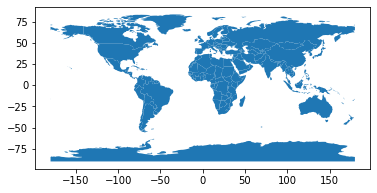

In [45]:
countries.plot()

In [47]:
# ATTENTION : This is just a mockup but be aware some countries are probably lost at this stage,
# due to name inconsistency in the merge operation. 
countries = countries.merge(right = df_2021_outliers, how = "left", left_on = "iso_a3", right_on = "iso_3")
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country name_x,iso_2_x,iso_3_x,Happiness ranking_x,GDP Ranking_x,Difference_x,Country name_y,iso_2_y,iso_3_y,Happiness ranking_y,GDP Ranking_y,Difference_y
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...","Tanzania, United Republic of",TZ,TZA,141.0,129.0,-12.0,"Tanzania, United Republic of",TZ,TZA,141.0,129.0,-12.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CA,CAN,13.0,18.0,5.0,Canada,CA,CAN,13.0,18.0,5.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,US,USA,18.0,6.0,-12.0,United States,US,USA,18.0,6.0,-12.0


/Users/andreyb/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

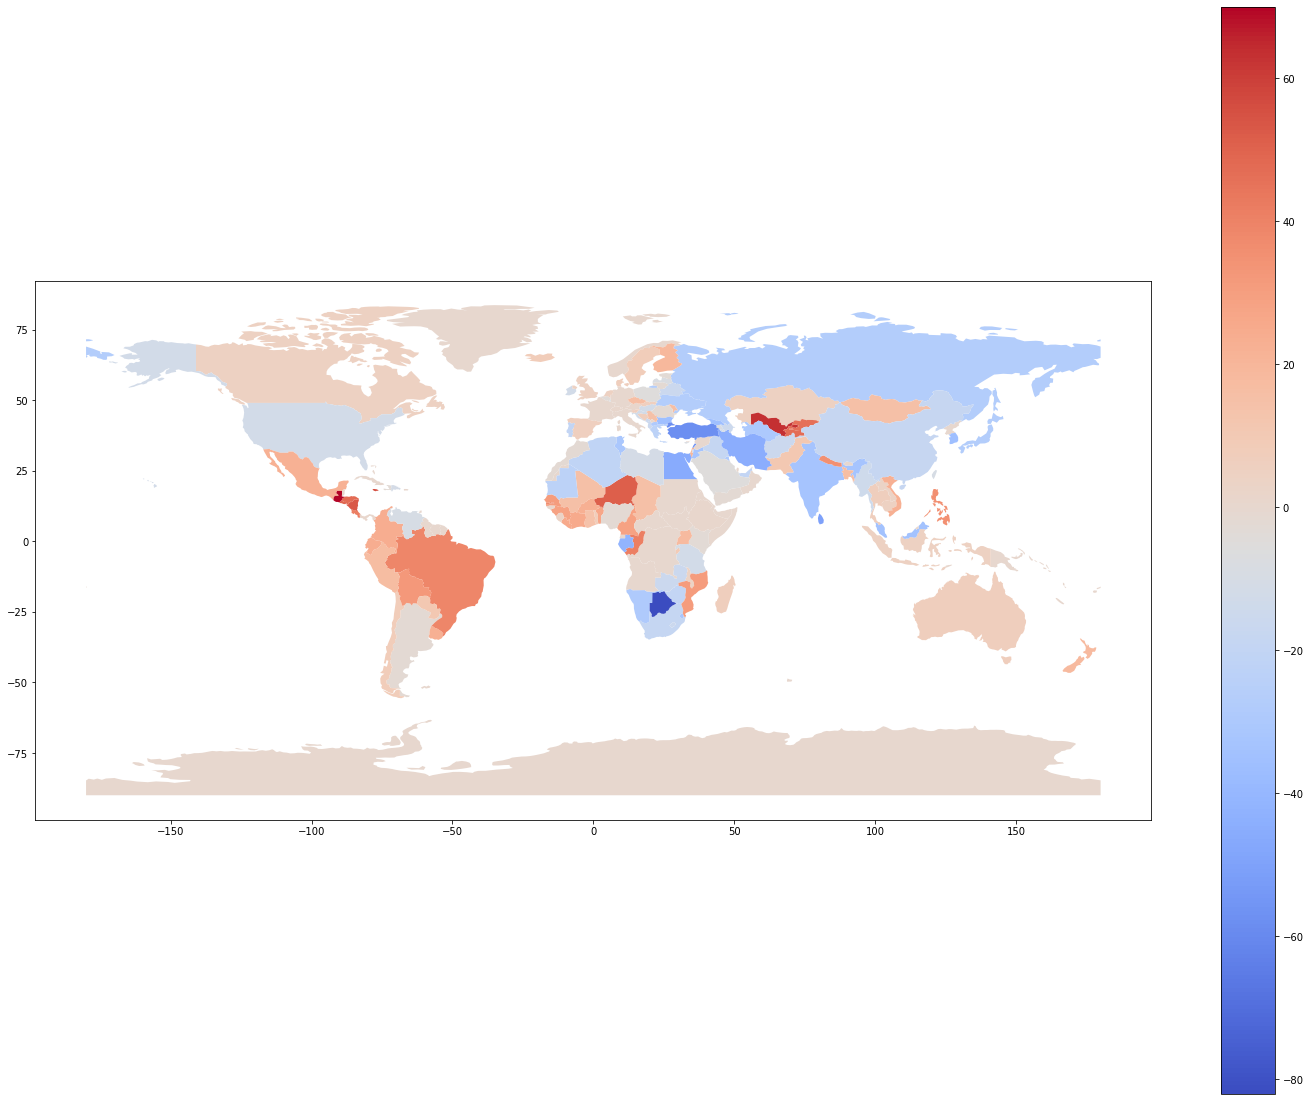

In [50]:
plot_differences = countries[["name", "geometry", "Difference_x"]]
plot_differences['Difference'] = plot_differences['Difference_x'].fillna(0)
plot_differences.plot(column='Difference', figsize=(25, 20),
           legend=True, cmap='coolwarm')

<b> Title : Ranking difference between GDP/inhabitant and happiness by country </b>

## Scatterplot

All credits for building (quickly) this visualisation, to the [solution showed here](https://community.plotly.com/t/put-images-inside-bubbles/41364/5). 

In [63]:
# only iso2 can be used with the country flag dictionary mentioned below
iso3_to_iso2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}

df = px.data.gapminder().query("year==2007")
df["iso_alpha2"] = df["iso_alpha"].map(iso3_to_iso2)

In [64]:
df = df.merge(right = df_happy_2021, how = "left", left_on = "iso_alpha", right_on = "iso_3")

In [65]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,iso_alpha2,Country name,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,iso_2,iso_3,Happiness ranking
0,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,AF,Afghanistan,...,0.370,0.000,0.126,0.000,0.122,0.010,1.895,AF,AFG,148.0
1,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,AL,Albania,...,1.008,0.529,0.646,0.491,0.168,0.024,2.250,AL,ALB,92.0
2,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12,DZ,Algeria,...,0.946,0.765,0.552,0.119,0.144,0.120,2.242,DZ,DZA,108.0
3,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24,AO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,AR,Argentina,...,1.162,0.980,0.646,0.544,0.069,0.067,2.461,AR,ARG,56.0


In [66]:
# todo : change with ladder score here 
fig = px.scatter(
    df,
    x="Logged GDP per capita",
    y="Ladder score",
    hover_name="country",
    hover_data=["Logged GDP per capita", "Ladder score", "pop"],
)
fig.update_traces(marker_color="rgba(0,0,0,0)")

minDim = df[["Logged GDP per capita", "Ladder score"]].max().idxmax()
maxi = df[minDim].max()
for i, row in df.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(
            source=f"https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{country_iso}.png",
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            x=row["Logged GDP per capita"],
            y=row["Ladder score"],
            sizex=np.sqrt(row["pop"] / df["pop"].max()) * maxi * 0.15 + maxi * 0.03,
            sizey=np.sqrt(row["pop"] / df["pop"].max()) * maxi * 0.15+ maxi * 0.03,
            sizing="contain",
            opacity=0.8,
            layer="above"
        )
    )

fig.update_layout(height=800, width=800, plot_bgcolor="#dfdfdf", yaxis_range=[0, 10])

fig.show()